In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


!pip install yfinance

import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 931.9 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.7-cp312-cp312-macosx_11_0_arm64.whl size=263900 sha256=098fd85b251fdb2cdafce5d28ceb2db5f3a9d4ae5513b8b98dcc430e7f322d36
  Stored in directory: /Users/irshad.ali/Library/Caches/pip/wheels/d8/b7/b5/bc5cfc21613ff88ce55cf4151a9f32e23bd8f4a2c4d51e7c8b
Successfully built peewee


In [5]:
ticker = "GLD"
data = yf.download( ticker, start = "2018-01-01" , end = "2023-12-31" , auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [7]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
Date,,,,,
2018-01-02 00:00:00+00:00,125.150002,125.180000,124.389999,124.660004,11762500
2018-01-03 00:00:00+00:00,124.820000,125.089996,124.099998,125.050003,7904300
2018-01-04 00:00:00+00:00,125.459999,125.849998,124.739998,124.889999,7329700
2018-01-05 00:00:00+00:00,125.330002,125.480003,124.830002,124.930000,5739900
2018-01-08 00:00:00+00:00,125.309998,125.320000,124.900002,125.199997,3566700


In [9]:
data['Returns'] = data['Close'].pct_change()


In [11]:
data.head()

Price,Close,High,Low,Open,Volume,Returns
Ticker,GLD,GLD,GLD,GLD,GLD,
Date,,,,,,
2018-01-02 00:00:00+00:00,125.150002,125.180000,124.389999,124.660004,11762500,NaN
2018-01-03 00:00:00+00:00,124.820000,125.089996,124.099998,125.050003,7904300,-0.002637
2018-01-04 00:00:00+00:00,125.459999,125.849998,124.739998,124.889999,7329700,0.005127
2018-01-05 00:00:00+00:00,125.330002,125.480003,124.830002,124.930000,5739900,-0.001036
2018-01-08 00:00:00+00:00,125.309998,125.320000,124.900002,125.199997,3566700,-0.000160


In [23]:
data.isna().sum()

Price    Ticker
Close    GLD       0
High     GLD       0
Low      GLD       0
Open     GLD       0
Volume   GLD       0
Returns            1
dtype: int64

In [25]:
data.isna().sum().sum()


1

In [17]:
data.shape

(1509, 6)

In [27]:
data = data.dropna()

In [29]:
data['Year'] = data.index.year
data['Month'] = data.index.strftime('%b')

/var/folders/ff/p5tgbsyj47q37_42nhmrsf0m0000gq/T/ipykernel_71953/2620268630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data.index.year
/var/folders/ff/p5tgbsyj47q37_42nhmrsf0m0000gq/T/ipykernel_71953/2620268630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data.index.strftime('%b')


In [31]:
data.head()

Price,Close,High,Low,Open,Volume,Returns,Year,Month
Ticker,GLD,GLD,GLD,GLD,GLD,,,
Date,,,,,,,,
2018-01-03 00:00:00+00:00,124.820000,125.089996,124.099998,125.050003,7904300,-0.002637,2018,Jan
2018-01-04 00:00:00+00:00,125.459999,125.849998,124.739998,124.889999,7329700,0.005127,2018,Jan
2018-01-05 00:00:00+00:00,125.330002,125.480003,124.830002,124.930000,5739900,-0.001036,2018,Jan
2018-01-08 00:00:00+00:00,125.309998,125.320000,124.900002,125.199997,3566700,-0.000160,2018,Jan
2018-01-09 00:00:00+00:00,124.730003,124.860001,124.230003,124.489998,9153600,-0.004628,2018,Jan


In [39]:
month = data.groupby(['Year','Month']).mean()

In [ ]:
# month.unstack(shift tab)

In [43]:
month.head(20)

Price            Close        High         Low        Open        Volume  \
Ticker             GLD         GLD         GLD         GLD           GLD   
Year Month                                                                 
2018 Apr    126.576191  126.966190  126.217619  126.569047  7.073243e+06   
     Aug    113.619565  114.060869  113.356522  113.800434  6.450287e+06   
     Dec    118.438421  118.807369  118.134211  118.447895  9.415700e+06   
     Feb    126.212106  126.743684  125.748948  126.298947  9.282442e+06   
     Jan    126.463501  126.856999  125.966500  126.424000  8.655280e+06   
     Jul    117.140476  117.510000  116.911429  117.217619  6.218833e+06   
     Jun    121.315239  121.683333  121.091429  121.435237  6.358543e+06   
     Mar    125.788572  126.095715  125.317618  125.707143  6.826219e+06   
     May    123.535001  123.895000  123.250909  123.550455  6.224500e+06   
     Nov    115.456666  115.808571  115.141905  115.468572  8.891867e+06   
     Oct    114.994783  115.358696  114.641740  114.987392  9.933752e+06   
     Sep    113.368948  113.750000  113.036316  113.368948  5.123995e+06   
2019 Apr    121.431430  121.713333  121.161429  121.380952  5.917243e+06   
     Aug    141.822273  142.467726  140.844548  141.464090  1.467625e+07   
     Dec    139.610476  139.929050  139.229999  139.537142  5.778343e+06   
     Feb    124.588421  125.024211  124.327370  124.750000  7.472784e+06   
     Jan    122.240476  122.478572  121.816190  122.072857  9.293967e+06   
     Jul    133.484090  134.095909  132.740910  133.430453  1.028941e+07   
     Jun    128.471500  128.898999  127.859501  128.321500  1.027996e+07   
     Mar    122.885238  123.261429  122.534286  123.005238  8.041886e+06   

Price        Returns  
Ticker                
Year Month            
2018 Apr   -0.000438  
     Aug   -0.000912  
     Dec    0.002558  
     Feb   -0.001077  
     Jan    0.001005  
     Jul   -0.001063  
     Jun   -0.001742  
     Mar    0.000324  
     May   -0.000535  
     Nov    0.000174  
     Oct    0.000937  
     Sep   -0.000338  
2019 Apr   -0.000307  
     Aug    0.003509  
     Dec    0.001721  
     Feb   -0.000304  
     Jan    0.001371  
     Jul    0.000059  
     Jun    0.003886  
     Mar   -0.000741

In [33]:
monthly_returns = data.groupby(['Year','Month'])['Returns'].mean().unstack()

In [35]:
monthly_returns.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2018,-0.000438,-0.000912,0.002558,-0.001077,0.001005,-0.001063,-0.001742,0.000324,-0.000535,0.000174,0.000937,-0.000338
2019,-0.000307,0.003509,0.001721,-0.000304,0.001371,0.000059,0.003886,-0.000741,0.000806,-0.001611,0.001119,-0.001676
2020,0.003426,0.000009,0.003120,-0.000269,0.002115,0.004692,0.001266,0.000159,0.001314,-0.002690,-0.000206,-0.001991
2021,0.001692,0.000007,0.001491,-0.003333,-0.001655,0.001203,-0.003317,-0.000463,0.003726,-0.000296,0.000723,-0.001516
2022,-0.001019,-0.001270,0.001424,0.003155,-0.000811,-0.001272,-0.000709,0.000639,-0.001539,0.003954,-0.000806,-0.001351


In [45]:
monthly_returns= monthly_returns[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [47]:
monthly_returns.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2018,0.001005,-0.001077,0.000324,-0.000438,-0.000535,-0.001742,-0.001063,-0.000912,-0.000338,0.000937,0.000174,0.002558
2019,0.001371,-0.000304,-0.000741,-0.000307,0.000806,0.003886,0.000059,0.003509,-0.001676,0.001119,-0.001611,0.001721
2020,0.002115,-0.000269,0.000159,0.003426,0.001314,0.001266,0.004692,0.000009,-0.001991,-0.000206,-0.002690,0.003120
2021,-0.001655,-0.003333,-0.000463,0.001692,0.003726,-0.003317,0.001203,0.000007,-0.001516,0.000723,-0.000296,0.001491
2022,-0.000811,0.003155,0.000639,-0.001019,-0.001539,-0.000709,-0.001272,-0.001270,-0.001351,-0.000806,0.003954,0.001424


In [49]:
# df.T = transpose

In [51]:
monthly_returns.T

Year,2018,2019,2020,2021,2022,2023
Month,,,,,,
Jan,0.001005,0.001371,0.002115,-0.001655,-0.000811,0.002835
Feb,-0.001077,-0.000304,-0.000269,-0.003333,0.003155,-0.002862
Mar,0.000324,-0.000741,0.000159,-0.000463,0.000639,0.003393
Apr,-0.000438,-0.000307,0.003426,0.001692,-0.001019,0.000486
May,-0.000535,0.000806,0.001314,0.003726,-0.001539,-0.000579
Jun,-0.001742,0.003886,0.001266,-0.003317,-0.000709,-0.001045
Jul,-0.001063,0.000059,0.004692,0.001203,-0.001272,0.001153
Aug,-0.000912,0.003509,0.000009,0.000007,-0.001270,-0.000548
Sep,-0.000338,-0.001676,-0.001991,-0.001516,-0.001351,-0.002423


In [ ]:
# sns.heatmap shift tab

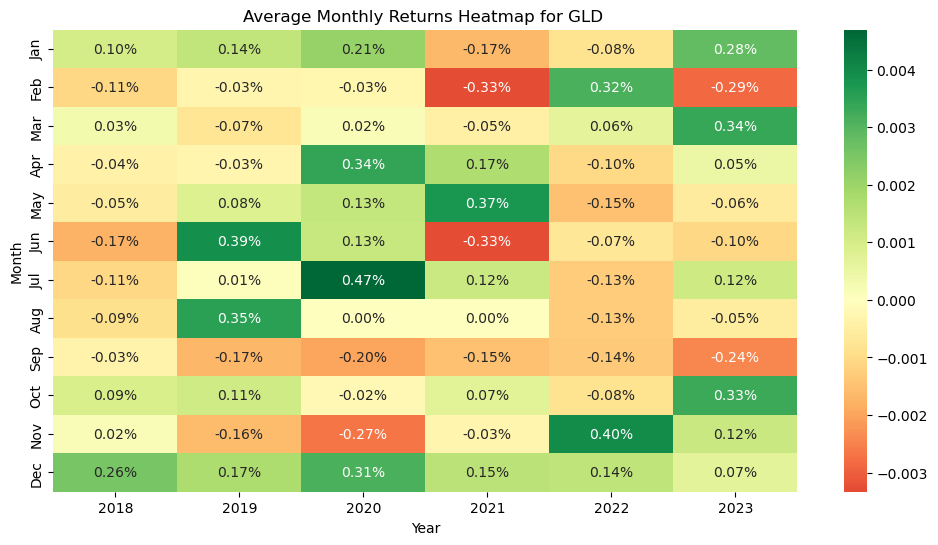

In [53]:
plt.figure(figsize = (12,6))
sns.heatmap(monthly_returns.T, annot= True,fmt =".2%", cmap ="RdYlGn" ,cbar = True , center = 0)
plt.title(f"Average Monthly Returns Heatmap for {ticker} ")
plt.show()

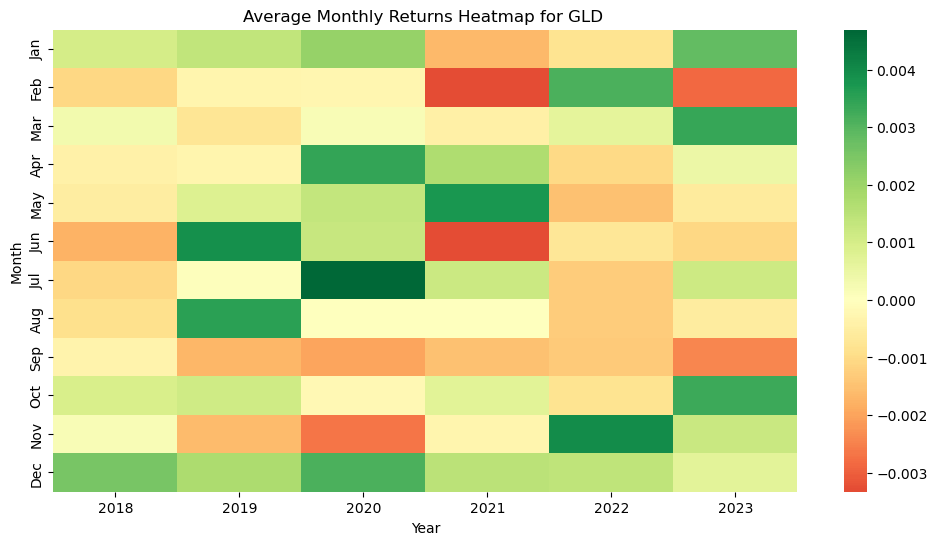

In [55]:
plt.figure(figsize = (12,6))
sns.heatmap(monthly_returns.T, annot= False,fmt =".2%", cmap ="RdYlGn" ,cbar = True , center = 0)
plt.title(f"Average Monthly Returns Heatmap for {ticker} ")
plt.show()

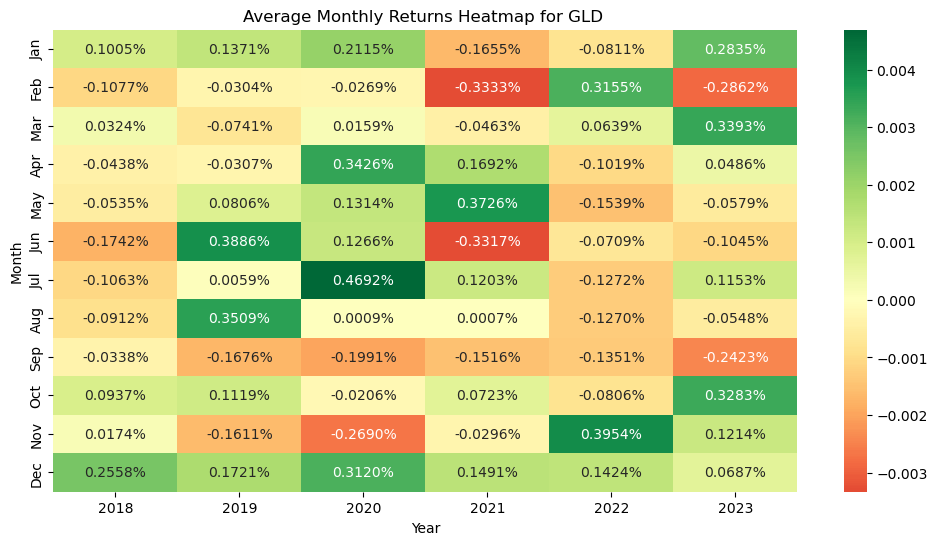

In [59]:
plt.figure(figsize = (12,6))
sns.heatmap(monthly_returns.T, annot= True,fmt =".4%", cmap ="RdYlGn" ,cbar = True , center = 0)
plt.title(f"Average Monthly Returns Heatmap for {ticker} ")
plt.show()

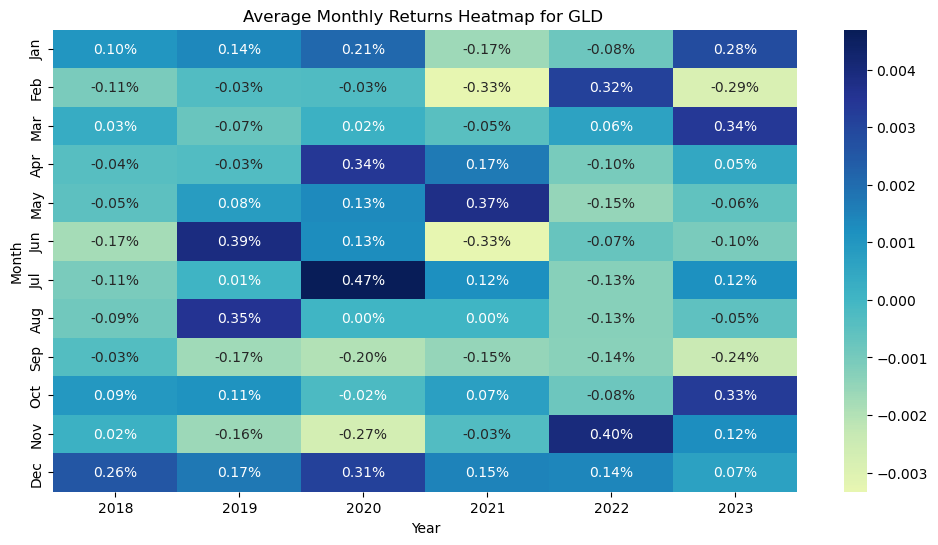

In [63]:
plt.figure(figsize = (12,6))
sns.heatmap(monthly_returns.T, annot= True,fmt =".2%", cmap ="YlGnBu" ,cbar = True , center = 0)
plt.title(f"Average Monthly Returns Heatmap for {ticker} ")
plt.show()

In [ ]:
# annot parameter ( values in cells)

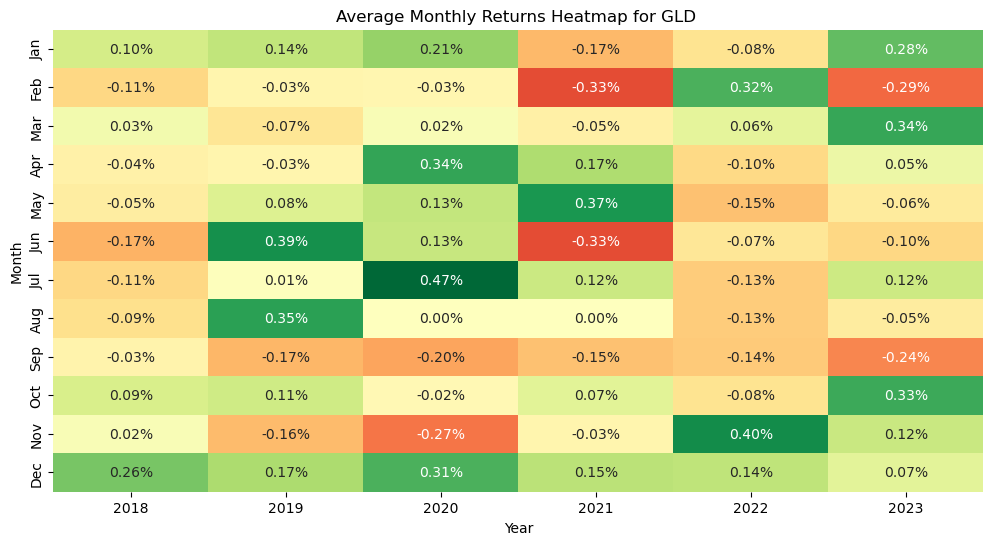

In [65]:
plt.figure(figsize = (12,6))
sns.heatmap(monthly_returns.T, annot= True,fmt =".2%", cmap ="RdYlGn" ,cbar = False , center = 0)
plt.title(f"Average Monthly Returns Heatmap for {ticker} ")
plt.show()

In [ ]:
# cbar parameter

In [ ]:
# In `seaborn`, `cmap` controls the color scheme of the heatmap, and you have a wide range of color maps to choose from. Here are some popular types of `cmap` variations:

# ### 1. **Sequential Color Maps**
#    - Suitable for data that moves from low to high values, often with lighter colors for low values and darker colors for high values.
#    - Examples:
#      - `"Blues"`: Shades of blue.
#      - `"Greens"`: Shades of green.
#      - `"Purples"`: Shades of purple.
#      - `"Oranges"`: Shades of orange.
#      - `"YlGn"`: Yellow to green.
#      - `"YlOrBr"`: Yellow to orange-brown.
#      - `"BuPu"`: Blue to purple.

# ### 2. **Diverging Color Maps**
#    - Good for data that has a meaningful midpoint (like 0), with colors diverging on either side of the center.
#    - Examples:
#      - `"RdYlGn"`: Red to yellow to green (often used for financial data).
#      - `"RdBu"`: Red to blue.
#      - `"PiYG"`: Pink to yellow-green.
#      - `"BrBG"`: Brown to blue-green.
#      - `"PRGn"`: Purple to green.
#      - `"coolwarm"`: Cool blue to warm red.
#      - `"Spectral"`: Various colors across the spectrum.

# ### 3. **Cyclic Color Maps**
#    - Useful for data that wraps around a cycle, like angular data or periodic data.
#    - Examples:
#      - `"twilight"`: A smooth gradient that wraps around.
#      - `"hsv"`: A hue-saturation-value cycle.
#      - `"twilight_shifted"`: A shifted version of twilight.

# ### 4. **Miscellaneous Color Maps**
#    - These color maps don’t fit into a specific category but offer unique color schemes.
#    - Examples:
#      - `"magma"`: Black-red-yellow gradient.
#      - `"viridis"`: Blue-green-yellow.
#      - `"cividis"`: Blue-yellow, color-blind-friendly.
#      - `"plasma"`: Purple-red-yellow.
#      - `"inferno"`: Black to orange-yellow.

# ### Example of Using Different `cmap` Values

# You can try different `cmap` values in your heatmap code like so:

# ```python
# plt.figure(figsize=(12, 6))
# sns.heatmap(monthly_returns.T, annot=True, fmt=".4%", cmap="Blues", cbar=True, center=0)
# plt.title(f"Average Monthly Returns Heatmap for {ticker}")
# plt.show()
# ```

# ### Testing Variations

# To see all available color maps in Matplotlib, you can use the following code:

# ```python
# import matplotlib.pyplot as plt
# print(plt.colormaps())
# ```

# Each of these options gives the heatmap a different look and feel, which can be tailored based on the data and aesthetic preferences.

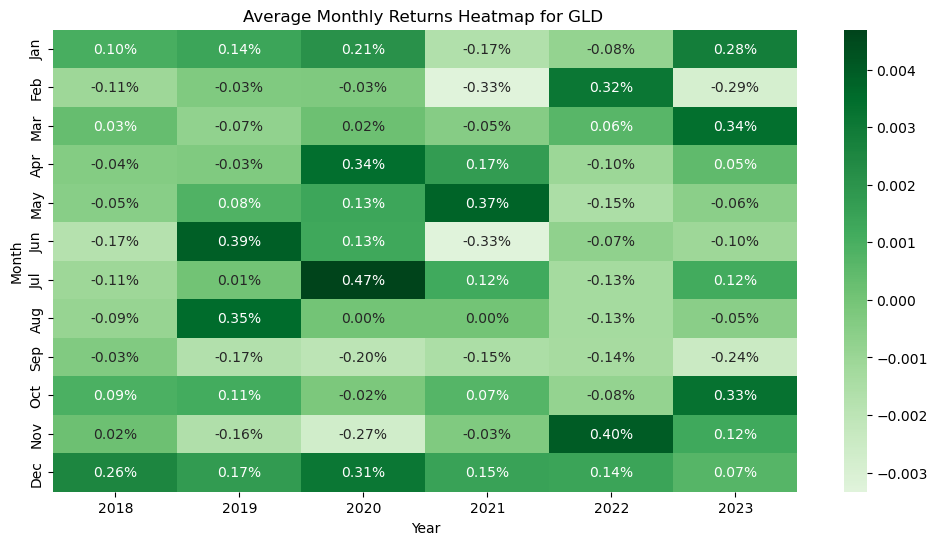

In [83]:
plt.figure(figsize = (12,6))
sns.heatmap(monthly_returns.T, annot= True,fmt =".2%", cmap ="Greens" ,cbar = True , center = 0)
plt.title(f"Average Monthly Returns Heatmap for {ticker} ")
plt.show()

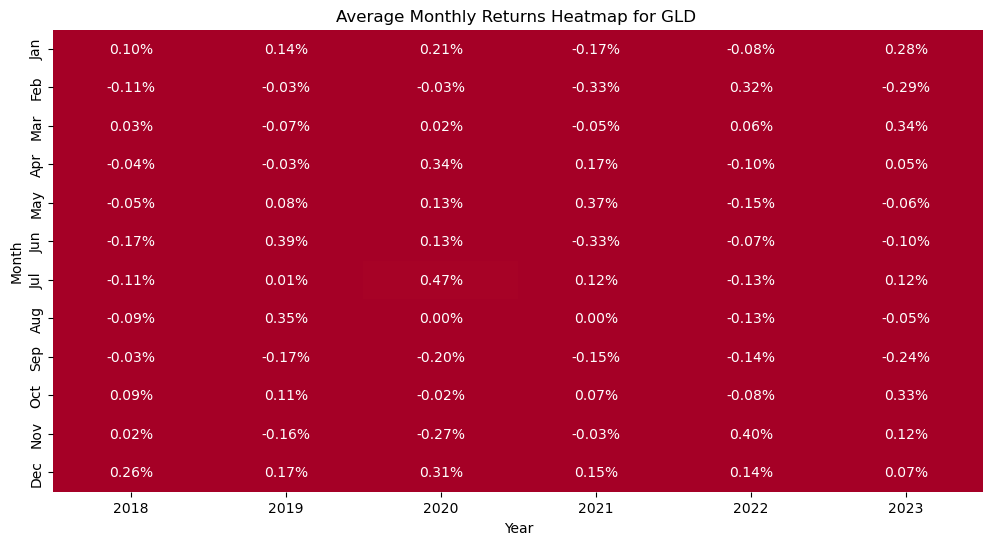

In [67]:
plt.figure(figsize = (12,6))
sns.heatmap(monthly_returns.T, annot= True,fmt =".2%", cmap ="RdYlGn" ,cbar = False , center = 1)
plt.title(f"Average Monthly Returns Heatmap for {ticker} ")
plt.show()

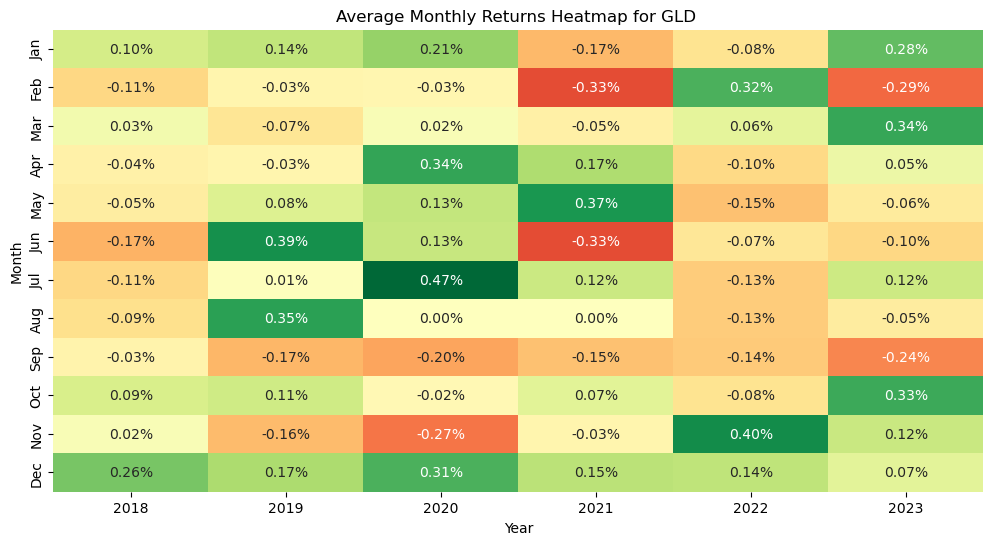

In [75]:
plt.figure(figsize = (12,6))
sns.heatmap(monthly_returns.T, annot= True,fmt =".2%", cmap ="RdYlGn" ,cbar = False , center = 0)
plt.title(f"Average Monthly Returns Heatmap for {ticker} ")
plt.show()

In [ ]:
# center parameter

In [ ]:
# The `center` parameter in `sns.heatmap` sets the midpoint around which the color map diverges, making it particularly useful for data with meaningful thresholds (like 0 for returns or -1 for Z-scores).

# ### Usage of `center`
# - **`center=0` (default)**: Colors will diverge around zero. Positive and negative values will display contrasting colors based on the color map.
# - **Other Values**: You can set any number as the center. For example:
#   - `center=1`: Colors will diverge around 1, so values below 1 will appear on one side of the color scale and values above 1 on the other.
#   - `center=-0.5`: This might be suitable if you want the midpoint to reflect a negative threshold (e.g., in datasets where negative scores are important).
  
# ### Practical Examples
# - **For financial returns**: `center=0` is common, so positive returns appear on one end (green) and negative returns on the other (red).
# - **For normalized data** (e.g., standard scores): Use `center=0` as it helps identify positive and negative deviations.
# - **For data around a specific threshold** (e.g., probabilities): You could set `center=0.5` if you want to highlight areas above and below 50%.

# ### Example Code
# ```python
# plt.figure(figsize=(12, 6))
# sns.heatmap(monthly_returns.T, annot=True, fmt=".4%", cmap="RdYlGn", cbar=True, center=1)
# plt.title("Average Monthly Returns Heatmap Centered at 1")
# plt.show()
# ```

# In this example, the heatmap will diverge at `1`, so cells with values below `1` will appear more red, and values above `1` will appear more green, assuming the `RdYlGn` colormap is used.

# ### Choosing a Center Value
# Choose the center based on the data's critical point. For data where you want neutral values to be highlighted as a middle ground, set `center` accordingly. Experimenting with `center` values helps in visualizing trends against important thresholds in the dataset.

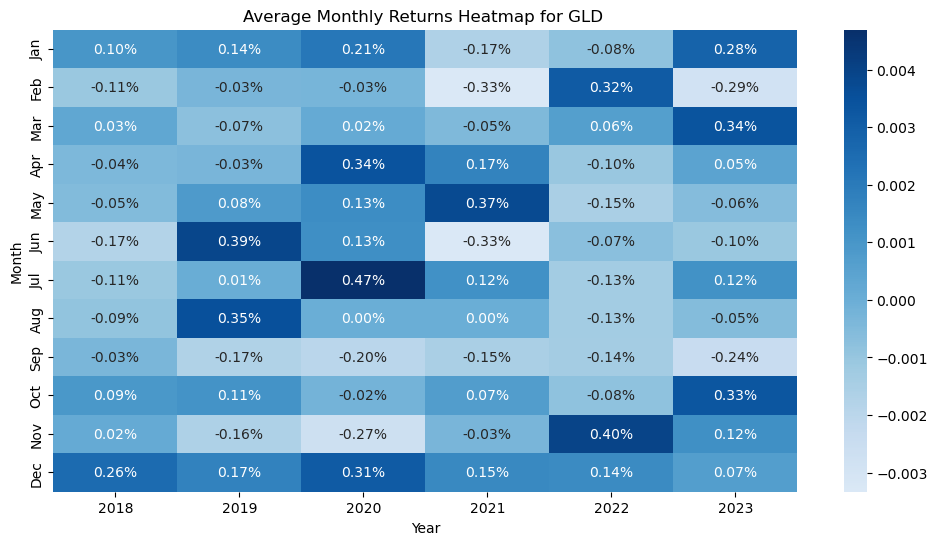

In [87]:
# plt.figure(figsize = (12,6))
# sns.heatmap(monthly_returns.T, annot= True,fmt =".2%", cmap ="twilight" ,cbar = False , center = 0)
# plt.title(f"Average Monthly Returns Heatmap for {ticker} ")
# plt.show()